# Set 1 - Diabetes

Should have used the best results from the previous LAB, in the overfitting thingy.

## Decision Tree

In [1]:
best_DT='smote'

In [25]:
from numpy import ndarray
from pandas import DataFrame, read_csv, unique
from matplotlib.pyplot import figure, subplots, savefig, show
from sklearn.tree import DecisionTreeClassifier
from ds_charts import plot_evaluation_results, multiple_line_chart
from sklearn.metrics import accuracy_score

target = 'readmitted'
file_tag = 'diabetes_'+best_DT
filename = 'datasets/'+best_DT

train: DataFrame = read_csv(f'{filename}_train.csv')
trnY: ndarray = train.pop(target).values
trnX: ndarray = train.values

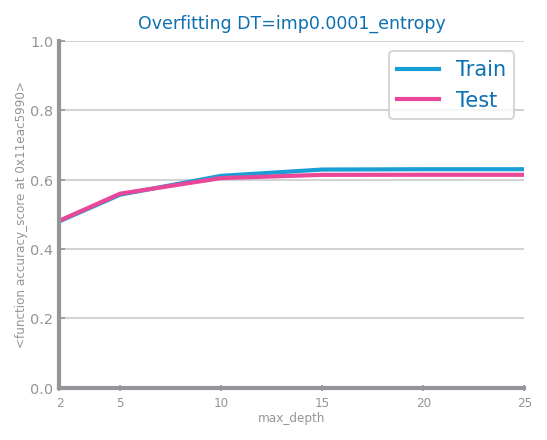

In [5]:
from ds_charts import plot_overfitting_study

imp = 0.0001
f = 'entropy'
eval_metric = accuracy_score
y_tst_values = []
y_trn_values = []
for d in max_depths:
    tree = DecisionTreeClassifier(max_depth=d, criterion=f, min_impurity_decrease=imp)
    tree.fit(trnX, trnY)
    prdY = tree.predict(tstX)
    prd_tst_Y = tree.predict(tstX)
    prd_trn_Y = tree.predict(trnX)
    y_tst_values.append(eval_metric(tstY, prd_tst_Y))
    y_trn_values.append(eval_metric(trnY, prd_trn_Y))
plot_overfitting_study(max_depths, y_trn_values, y_tst_values, name=f'DT=imp{imp}_{f}', xlabel='max_depth', ylabel=str(eval_metric))

## Random Forests

In [9]:
best_RF='over_sampling'

In [19]:
from numpy import ndarray
from pandas import DataFrame, read_csv, unique
from matplotlib.pyplot import figure, subplots, savefig, show
from sklearn.ensemble import RandomForestClassifier
from ds_charts import plot_evaluation_results, multiple_line_chart, horizontal_bar_chart, HEIGHT
from sklearn.metrics import accuracy_score

file_tag = 'drought'
filename = 'datasets/drought'

target = 'readmitted'

target = 'readmitted'
file_tag = 'diabetes_'+best_RF
filename = 'datasets/'+best_RF

train: DataFrame = read_csv(f'{filename}_train.csv')
trnY: ndarray = train.pop(target).values
trnX: ndarray = train.values

RUN = False

if(RUN):
    for technique in [best_RF]:
        file_tag = 'diabetes_'+technique
        filename = 'datasets/'+technique

        train: DataFrame = read_csv(f'{filename}_train.csv')
        trnY: ndarray = train.pop(target).values
        trnX: ndarray = train.values
        labels = unique(trnY)
        labels.sort()

        test: DataFrame = read_csv(f'{filename}_test.csv')
        tstY: ndarray = test.pop(target).values
        tstX: ndarray = test.values

        n_estimators = [5, 10, 25, 50, 75, 100, 200, 300, 400]
        max_depths = [5, 10, 25]
        max_features = [.3, .5, .7, 1]
        best = ('', 0, 0)
        last_best = 0
        best_model = None

        cols = len(max_depths)
        figure()
        fig, axs = subplots(1, cols, figsize=(cols*HEIGHT, HEIGHT), squeeze=False)
        for k in range(len(max_depths)):
            d = max_depths[k]
            values = {}
            for f in max_features:
                yvalues = []
                for n in n_estimators:
                    print(k, f, n)
                    rf = RandomForestClassifier(n_estimators=n, max_depth=d, max_features=f)
                    rf.fit(trnX, trnY)
                    prdY = rf.predict(tstX)
                    yvalues.append(accuracy_score(tstY, prdY))
                    if yvalues[-1] > last_best:
                        best = (d, f, n)
                        last_best = yvalues[-1]
                        best_model = rf

                values[f] = yvalues
            multiple_line_chart(n_estimators, values, ax=axs[0, k], title=f'Random Forests with max_depth={d}',
                                   xlabel='nr estimators', ylabel='accuracy', percentage=True)
        savefig(f'images/{file_tag}_rf_study.png')
        show()
    print('Best results with depth=%d, %1.2f features and %d estimators, with accuracy=%1.2f'%(best[0], best[1], best[2], last_best))

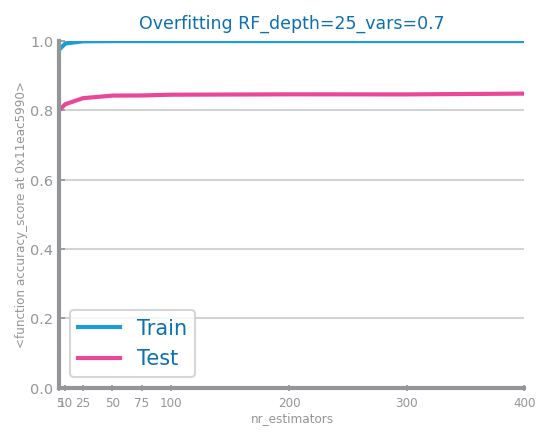

In [21]:
from ds_charts import plot_overfitting_study

f = 0.7
max_depth = 25
eval_metric = accuracy_score
y_tst_values = []
y_trn_values = []
n_estimators = [5, 10, 25, 50, 75, 100, 200, 300, 400]

for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=n, max_depth=max_depth, max_features=f)
    rf.fit(trnX, trnY)
    prd_tst_Y = rf.predict(tstX)
    prd_trn_Y = rf.predict(trnX)
    y_tst_values.append(eval_metric(tstY, prd_tst_Y))
    y_trn_values.append(eval_metric(trnY, prd_trn_Y))
plot_overfitting_study(n_estimators, y_trn_values, y_tst_values, name=f'RF_depth={max_depth}_vars={f}', xlabel='nr_estimators', ylabel=str(eval_metric))

## KNN

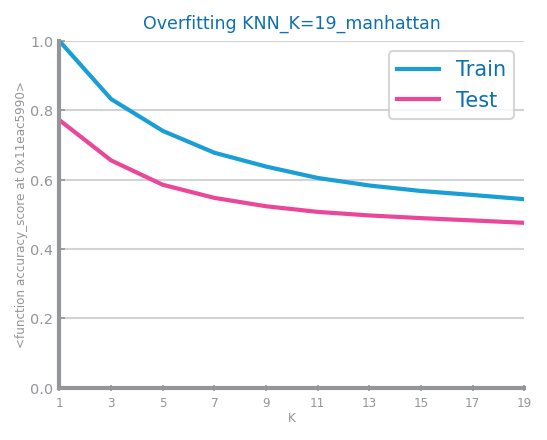

In [24]:
from matplotlib.pyplot import figure, savefig
from sklearn.neighbors import KNeighborsClassifier

def plot_overfitting_study(xvalues, prd_trn, prd_tst, name, xlabel, ylabel):
    evals = {'Train': prd_trn, 'Test': prd_tst}
    figure()
    multiple_line_chart(xvalues, evals, ax = None, title=f'Overfitting {name}', xlabel=xlabel, ylabel=ylabel, percentage=True)
    savefig('images/overfitting_{name}.png')

nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
d = 'manhattan'
eval_metric = accuracy_score
y_tst_values = []
y_trn_values = []
for n in nvalues:
    knn = KNeighborsClassifier(n_neighbors=n, metric=d)
    knn.fit(trnX, trnY)
    prd_tst_Y = knn.predict(tstX)
    prd_trn_Y = knn.predict(trnX)
    y_tst_values.append(eval_metric(tstY, prd_tst_Y))
    y_trn_values.append(eval_metric(trnY, prd_trn_Y))
plot_overfitting_study(nvalues, y_trn_values, y_tst_values, name=f'KNN_K={n}_{d}', xlabel='K', ylabel=str(eval_metric))